In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [3]:
train_set = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from matplotlib import pyplot as plt
import numpy as np
def imshow(img):
    # [channel, height, weight] to [height, weight, channel]
    img = img / 2 + 0.5
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    plt.figure(figsize=(25,10))
    plt.imshow(npimg)

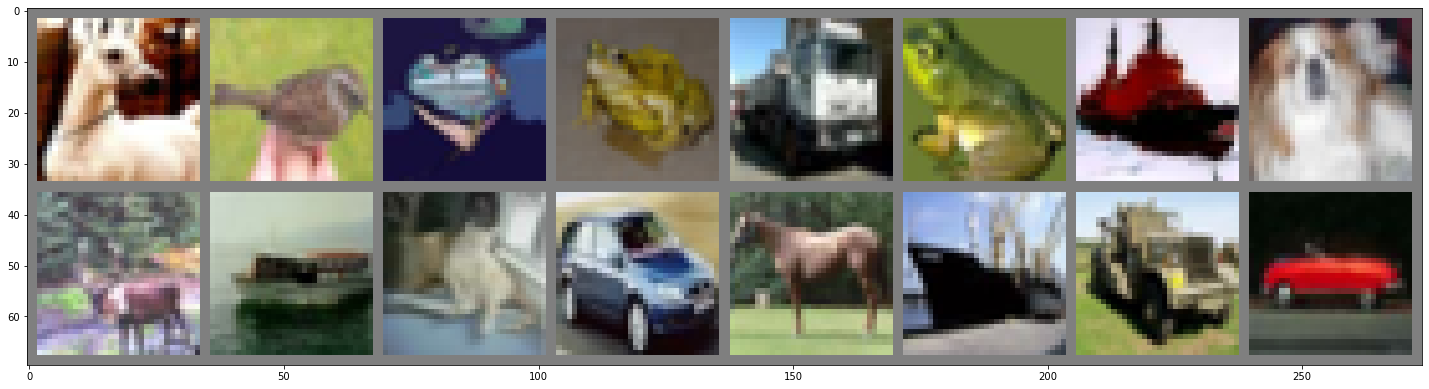

In [5]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
imshow(torchvision.utils.make_grid(images))

In [6]:
import torch
from ML_Package.NN import NN

In [7]:
nn = NN()
nn

NN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn.parameters(), lr = 0.0001, momentum = 0.9)

In [9]:
for epoch in range(1):
    for i, data in enumerate(train_loader):
        images, labels = data
        outputs = nn(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('epoch: {}, step: {}, loss: {}'.format(epoch, i, loss.item()))

epoch: 0, step: 0, loss: 2.290778875350952
epoch: 0, step: 100, loss: 2.296194314956665
epoch: 0, step: 200, loss: 2.298344850540161
epoch: 0, step: 300, loss: 2.2947797775268555
epoch: 0, step: 400, loss: 2.340062379837036
epoch: 0, step: 500, loss: 2.3233253955841064
epoch: 0, step: 600, loss: 2.2881085872650146
epoch: 0, step: 700, loss: 2.3196909427642822
epoch: 0, step: 800, loss: 2.283001184463501
epoch: 0, step: 900, loss: 2.296398162841797
epoch: 0, step: 1000, loss: 2.293991804122925
epoch: 0, step: 1100, loss: 2.302008867263794
epoch: 0, step: 1200, loss: 2.2918269634246826
epoch: 0, step: 1300, loss: 2.283228635787964
epoch: 0, step: 1400, loss: 2.288611888885498
epoch: 0, step: 1500, loss: 2.3209009170532227
epoch: 0, step: 1600, loss: 2.3121187686920166
epoch: 0, step: 1700, loss: 2.2772397994995117
epoch: 0, step: 1800, loss: 2.3152778148651123
epoch: 0, step: 1900, loss: 2.292135000228882
epoch: 0, step: 2000, loss: 2.2994141578674316
epoch: 0, step: 2100, loss: 2.301144

In [10]:
torch.save(nn.state_dict(), './model.pt')

In [13]:
train_loss_hist = []
test_loss_hist = []

for epoch in tqdm(range(20)):
    #训练
    nn.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        images, labels = data        
        outputs = nn(images)
        loss = criterion(outputs, labels) # 计算损失
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if(i%250 == 0): #每250 mini batch 测试一次
            correct = 0.0
            total = 0.0

            nn.eval()
            with torch.no_grad():
                for test_data in test_loader:
                    test_images, test_labels = test_data
                    test_outputs = nn(test_images)
                    test_loss = criterion(test_outputs, test_labels)

            train_loss_hist.append(running_loss/250)
            test_loss_hist.append(test_loss.item())
            running_loss=0.0

100%|██████████| 20/20 [1:15:25<00:00, 226.27s/it]


In [14]:
torch.save(nn.state_dict(), './model.pt')

In [19]:
model = torch.load('./model.pt')
for test_data in test_loader:
    test_images, test_labels = test_data
    test_outputs = nn(test_images)
    test_loss = criterion(test_outputs, test_labels)
    print(test_loss.item())
    break

1.8106669187545776
